# step 1: import all the required libraries and warnings

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# step 2: Importing the datasets

In [3]:
#importing application data
app = pd.read_csv("application_data.csv")
app.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


# step 3: Application dataset analysis

In [28]:
#STEP 3A: data inspection of app df

In [30]:
#df shape check
app.shape

(307511, 122)

In [31]:
#extracting whole of df summary
app.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [32]:
#dtypes look good for all the columns info extracted above

In [33]:
#get statistical summary of app df
app.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [34]:
#STEP 3B: Data cleaning of app df


In [4]:
#checking no of missing values in columns
app.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [5]:
#checking for missing values % in all columns
mv= app.isnull().sum()/len(app)*100
mv

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 122, dtype: float64

In [6]:
#columns with missing values >40%
mv_drop_info = mv[mv>40].keys()
mv_drop_info

Index(['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'FO

In [7]:
#dropping columns with > 40% mv
app2 = app.drop(mv_drop_info, axis=1)

In [8]:
#checking shape of new df app2
app2.shape

(307511, 73)

In [48]:
# NOW WE HAVE APP2 WITH 49 COLUMNS LESS WHERE COLUMNS WITH >40% MISSING VALUES HAVE BEEN DROPPED FOR BETTER ANALYSIS


In [9]:
#checking summary of new df
app2.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [12]:
#checking for missing % values in app2

mv2 =app2.isnull().sum()/len(app)*100

mv2

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 73, dtype: float64

In [72]:
#missing values and data quality check

In [13]:
#columns with missing values >13%
mv_drop_info2 = mv2[mv2>13].keys()
mv_drop_info2

Index(['OCCUPATION_TYPE', 'EXT_SOURCE_3', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

In [14]:
#since 'OCCUPATION_TYPE' & 'EXT_SOURCE_3' can be used for further analysis and rest of the columns with missing vales>13% are not relatable to our objective/target variable we are dropping rest of the columns


mv_drop_info2 = mv2[mv2>40].keys()
mv_drop_info2

Index([], dtype='object')

In [15]:
new_app = app2.drop(mv_drop_info2, axis=1)

new_app.shape

(307511, 73)

In [16]:
#new_app is the new df with columns that are more relevant to the target variable and with missing variables <40 %

new_app.isnull().sum()/len(new_app)*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 73, dtype: float64

In [17]:
#1. ext_source_2 & ext_source_3  : to handle these we need to understand the correlation of these two with target variable if it's not positive then we can drop these two columns as they wouldn't add on to our analysis further
x= ["EXT_SOURCE_2","EXT_SOURCE_3"]

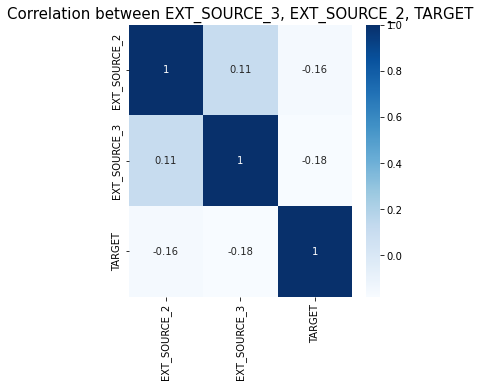

In [18]:
plt.figure(figsize= [5,5])

sns.heatmap(new_app[x+["TARGET"]].corr(), cmap="Blues",annot=True)

plt.title("Correlation between EXT_SOURCE_3, EXT_SOURCE_2, TARGET", fontdict={"fontsize":15})
plt.show()

In [19]:
#since there's no positive correlation between both the ext sources 2&3 with target we can drop these two columns:

new_app.drop(x, axis=1, inplace= True)

In [20]:
#checking for the shape after dropping these 2 columns:
new_app.shape

(307511, 71)

In [21]:
#flag columns analysis & handling:
#first since there are many columns starting with flag we need to put all flag columns under one variable:
flag = [col for col in new_app.columns if "FLAG" in col]
flag

['FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [ ]:
#there are 28 columns starting with flag with dtypes int and object and for the sake of analysis we need to change the dtypes to decide which flag columns to loose 

In [22]:
#flag+target to find the relation between flag columns and target:
flag_target = new_app[flag+["TARGET"]]


In [23]:
#  replacing "1" as Y being TRUE and "0" as N being False where 1 is representing defaulter and 0, repayer

for i in flag_target:
    if i!= "TARGET":
        flag_target[i] = flag_target[i].replace({1:"Y", 0:"N"})


In [24]:
#checking the above code:
flag_target.head(7)

,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,...,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,TARGET
0,N,Y,Y,Y,N,Y,Y,N,N,Y,...,N,N,N,N,N,N,N,N,N,1
1,N,N,Y,Y,N,Y,Y,N,N,Y,...,N,N,N,N,N,N,N,N,N,0
2,Y,Y,Y,Y,Y,Y,Y,N,N,N,...,N,N,N,N,N,N,N,N,N,0
3,N,Y,Y,Y,N,Y,N,N,N,Y,...,N,N,N,N,N,N,N,N,N,0
4,N,Y,Y,Y,N,Y,N,N,N,N,...,N,N,N,N,N,N,N,N,N,0
5,N,Y,Y,Y,Y,Y,Y,N,N,Y,...,N,N,N,N,N,N,N,N,N,0
6,Y,Y,Y,Y,N,Y,Y,N,N,N,...,N,Y,N,N,N,N,N,N,N,0


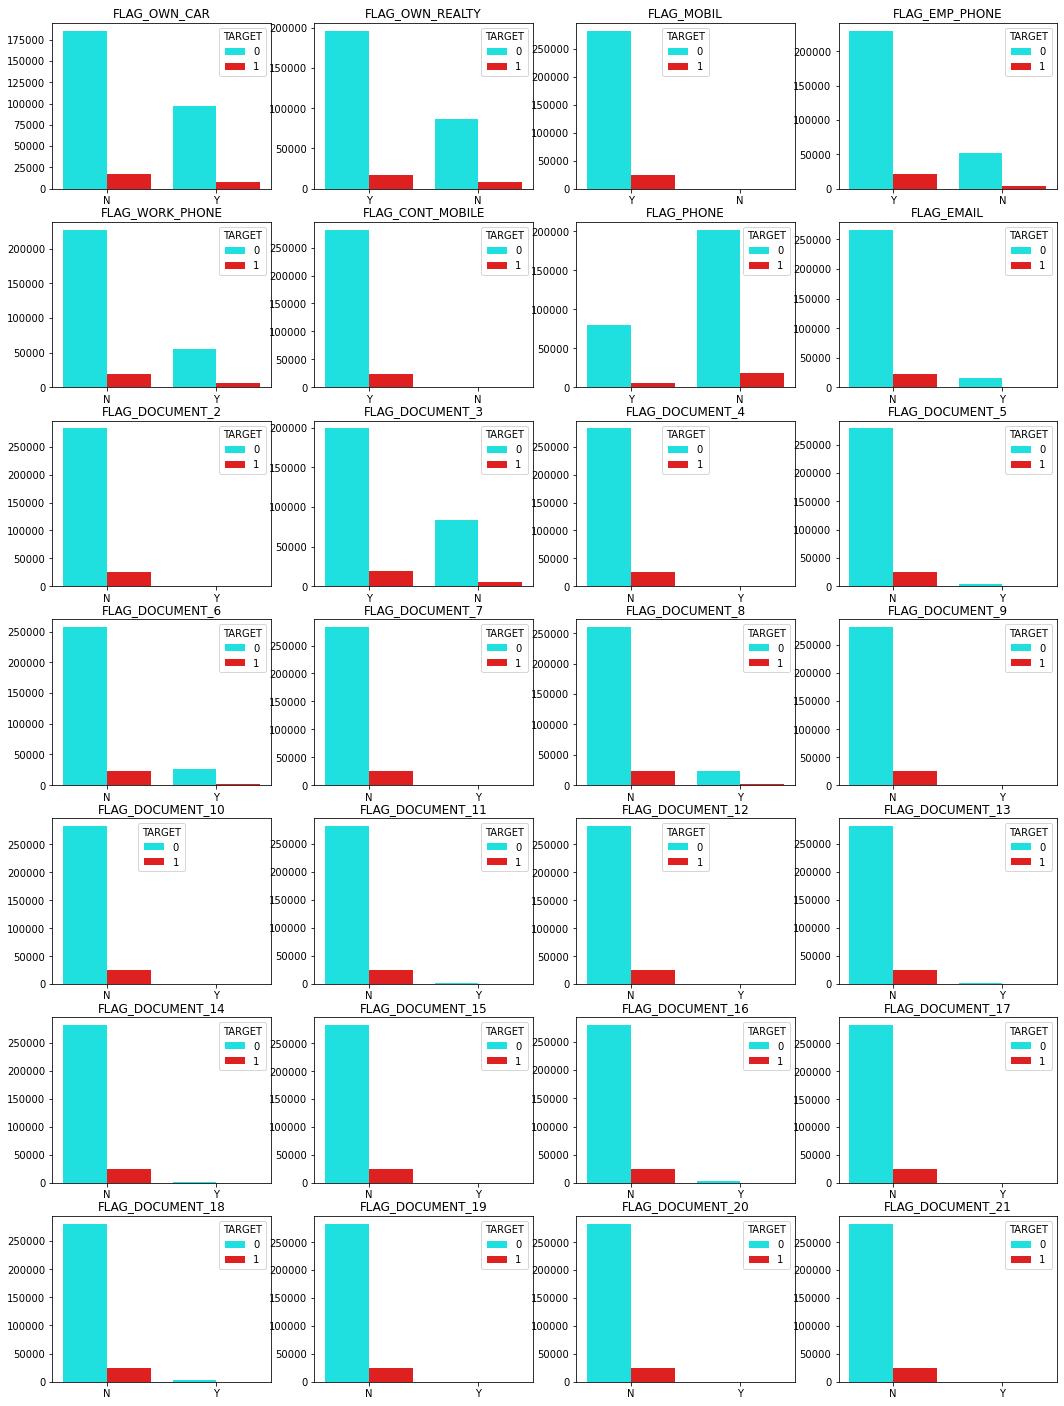

In [30]:
import itertools

# Plotting all the graph to decide which flag columns to remove
plt.figure(figsize = [18,25])

for i,j in itertools.zip_longest(flag,range(len(flag))):
    plt.subplot(7,4,j+1)
    ax = sns.countplot(flag_target[i], hue = flag_target["TARGET"], palette = ["cyan","red"])
    
    plt.xlabel("")
    plt.ylabel("")
    plt.title(i)


In [ ]:
#since  keeping FLAG_DOCUMENT_3,FLAG_OWN_REALTY, FLAG_MOBIL have more 1 than 0 we can keep these and remove the rest

In [31]:
#dropping other flag columns except FLAG_DOCUMENT_3,FLAG_OWN_REALTY, FLAG_MOBIL :
flag_target.drop(["TARGET","FLAG_OWN_REALTY","FLAG_MOBIL","FLAG_DOCUMENT_3"], axis=1 , inplace = True)
new_app.drop(flag_target.columns, axis=1, inplace= True)

In [32]:
#checking shape after dropping flag cols:
new_app.shape

(307511, 46)

In [33]:
#data imputing for the following variables that have missing values:
OCCUPATION_TYPE                31.345545
AMT_REQ_CREDIT_BUREAU_HOUR     13.501631
AMT_REQ_CREDIT_BUREAU_DAY      13.501631
AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631

SyntaxError: invalid syntax (3731436165.py, line 2)

In [120]:
#since occupation type has the max missing values in the df now we can impute this by replacing the 31.35% by unkown inplace of nan

In [34]:
new_app["OCCUPATION_TYPE"] = new_app["OCCUPATION_TYPE"].fillna("Unknown") 

new_app["OCCUPATION_TYPE"].isnull().sum() 
#after this 0 missing values in occupation type

0

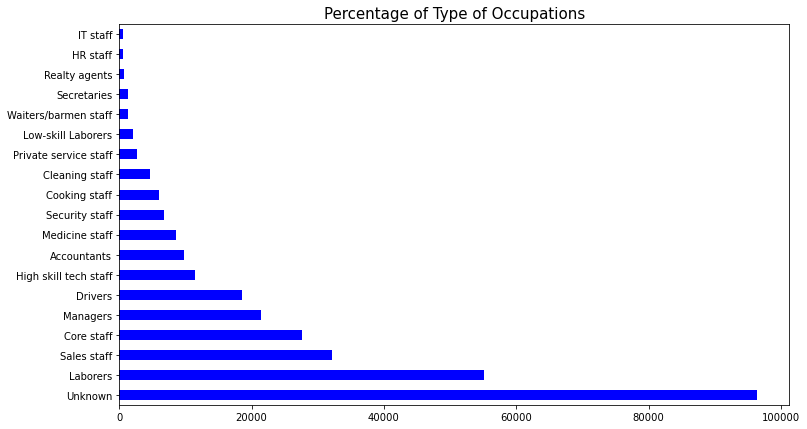

In [35]:
# Plotting a percentage graph for "OCCUPATION_TYPE"

plt.figure(figsize = [12,7])
(new_app["OCCUPATION_TYPE"].value_counts()).plot.barh(color= "blue",width = .5)
plt.title("Percentage of Type of Occupations", fontdict={"fontsize":15})
plt.show()

#most of the applicants occupation is unkown or they are mostly labourers,sales staff so on

In [124]:
#imputation for AMT_REQ_CREDIT, this indicates in how many other institutions has the applicant been looking for loan parallely and how many loans were taken over the past year

In [143]:
#like ext source we can combine this category into a single dataframe and also all of these columns dtype is float so we can first get a statistical summary of the columns and replace missing values with median,since the data for median is skewed 

In [36]:
new_app[["AMT_REQ_CREDIT_BUREAU_YEAR","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_WEEK",
"AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_HOUR"]].describe()


,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR
count,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,1.899974,0.265474,0.267395,0.034362,0.007000,0.006402
std,1.869295,0.794056,0.916002,0.204685,0.110757,0.083849
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,25.000000,261.000000,27.000000,8.000000,9.000000,4.000000


In [37]:
amt_combine = ["AMT_REQ_CREDIT_BUREAU_YEAR","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_WEEK",
"AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_HOUR"]

In [38]:
new_app.fillna(new_app[amt_combine].median(),inplace = True)

In [40]:
new_app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,Y,0,202500.0,406597.5,24700.5,351000.0,...,2.0,2.0,-1134.0,1,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,0,270000.0,1293502.5,35698.5,1129500.0,...,1.0,0.0,-828.0,1,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,0,67500.0,135000.0,6750.0,135000.0,...,0.0,0.0,-815.0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,Y,0,135000.0,312682.5,29686.5,297000.0,...,2.0,0.0,-617.0,1,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,Cash loans,M,Y,0,121500.0,513000.0,21865.5,513000.0,...,0.0,0.0,-1106.0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
new_app.isnull().sum()/len(app)*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.090403
NAME_TYPE_SUITE                0.420148
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
FLAG_MOBIL                     0.000000
OCCUPATION_TYPE                0.000000
CNT_FAM_MEMBERS                0.000650
REGION_RATING_CLIENT           0.000000
REGION_RATING_CLIENT_W_CITY    0.000000


In [145]:
#still there are a few missing values but they can be ignored since they are of less %

In [146]:
#standardising DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE as they're in negaative and are to be converted into absolute values:

In [42]:
#converting DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE into abs value :
days_abs =["DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION", "DAYS_ID_PUBLISH","DAYS_LAST_PHONE_CHANGE"]

new_app[days_abs]= abs(new_app[days_abs])

In [43]:
#checking for convertion:
new_app[days_abs].describe()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
count,307511.000000,307511.000000,307511.000000,307511.000000,307510.000000
mean,16036.995067,67724.742149,4986.120328,2994.202373,962.858788
std,4363.988632,139443.751806,3522.886321,1509.450419,826.808487
min,7489.000000,0.000000,0.000000,0.000000,0.000000
25%,12413.000000,933.000000,2010.000000,1720.000000,274.000000
50%,15750.000000,2219.000000,4504.000000,3254.000000,757.000000
75%,19682.000000,5707.000000,7479.500000,4299.000000,1570.000000
max,25229.000000,365243.000000,24672.000000,7197.000000,4292.000000


In [152]:
#binning:

In [46]:
# Binning AGE to agegroup and plotting it
new_app["AGE"] = new_app["DAYS_BIRTH"]/365
new_app['agegroup']= pd.cut(new_app["AGE"],bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75])
new_app['agegroup'].value_counts(normalize=True)

(35, 40]    0.139403
(40, 45]    0.134649
(30, 35]    0.128256
(45, 50]    0.114256
(50, 55]    0.113628
(55, 60]    0.107703
(25, 30]    0.106864
(60, 65]    0.089350
(20, 25]    0.039540
(65, 70]    0.026350
(0, 5]      0.000000
(5, 10]     0.000000
(10, 15]    0.000000
(15, 20]    0.000000
(70, 75]    0.000000
Name: agegroup, dtype: float64

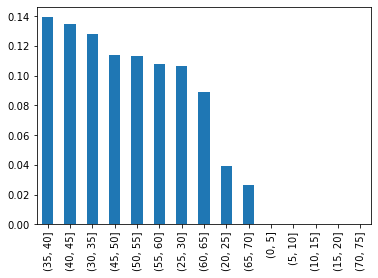

In [47]:
new_app['agegroup'].value_counts(normalize=True).plot.bar()
plt.show()
#from the graph we can incur that most of the applicants are in the age groups 25-60 who most probably are working and earning

In [109]:
# Binning 'AMT_INCOME_TOTAL' to create income group and plot it
new_app['incomegroup']= pd.qcut(new_app['AMT_INCOME_TOTAL'],q=[0,0.1,0.3,0.6,0.8,1],labels=['least','Low','Medium','High',''])

new_app['incomegroup'].value_counts(normalize=True)

Medium    0.300048
Low       0.200009
          0.199977
High      0.199964
least     0.100003
Name: incomegroup, dtype: float64

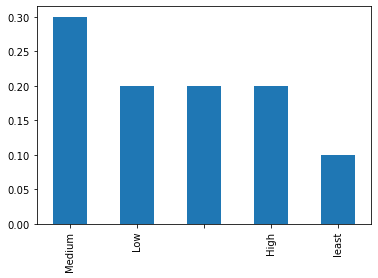

In [110]:
new_app['incomegroup'].value_counts(normalize=True).plot.bar()
plt.show()

In [52]:
#binning income level:
new_app["AMT_INCOME_TOTAL"] = new_app["DAYS_BIRTH"]/100000
bins = [0,1,2,3,4,5,6,7,8,9,10,11]
slot = ['0-1L','1L-2L', '2L-3L','3L-4L','4L-5L','5L-6L','6L-7L','7L-8L','8L-9L','9L-10L','10L Above']

new_app['AMT_INCOME_RANGE']=pd.cut(new_app['AMT_INCOME_TOTAL'],bins,labels=slot)
# Use the correct column name 'AMT_INCOME_RANGE'
income_group_distribution = new_app['AMT_INCOME_RANGE'].value_counts(normalize=True)
print(income_group_distribution)

0-1L         1.0
1L-2L        0.0
2L-3L        0.0
3L-4L        0.0
4L-5L        0.0
5L-6L        0.0
6L-7L        0.0
7L-8L        0.0
8L-9L        0.0
9L-10L       0.0
10L Above    0.0
Name: AMT_INCOME_RANGE, dtype: float64


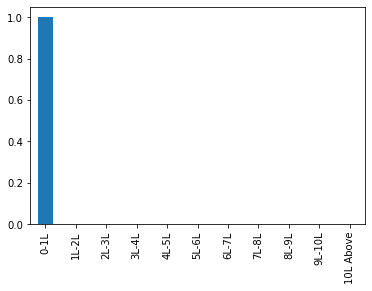

In [54]:
new_app['AMT_INCOME_RANGE'].value_counts(normalize=True).plot.bar()
plt.show()

In [170]:
#identifying outliers and possible suggestions:


In [55]:
new_app.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE
count,307511.000000,307511.000000,307511.000000,307511.00000,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.417052,0.16037,5.990260e+05,27108.573909,5.383962e+05,0.020868,16036.995067,67724.742149,...,0.100049,962.858788,0.710023,0.005538,0.006055,0.029723,0.231293,0.229631,1.778463,43.936973
std,102790.175348,0.272419,0.722121,0.04364,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,139443.751806,...,0.362291,826.808487,0.453752,0.078014,0.103037,0.190728,0.856810,0.744059,1.765523,11.956133
min,100002.000000,0.000000,0.000000,0.07489,4.500000e+04,1615.500000,4.050000e+04,0.000290,7489.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.517808
25%,189145.500000,0.000000,0.000000,0.12413,2.700000e+05,16524.000000,2.385000e+05,0.010006,12413.000000,933.000000,...,0.000000,274.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,34.008219
50%,278202.000000,0.000000,0.000000,0.15750,5.135310e+05,24903.000000,4.500000e+05,0.018850,15750.000000,2219.000000,...,0.000000,757.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,43.150685
75%,367142.500000,0.000000,1.000000,0.19682,8.086500e+05,34596.000000,6.795000e+05,0.028663,19682.000000,5707.000000,...,0.000000,1570.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,53.923288
max,456255.000000,1.000000,19.000000,0.25229,4.050000e+06,258025.500000,4.050000e+06,0.072508,25229.000000,365243.000000,...,24.000000,4292.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000,69.120548


In [ ]:
#we can say that 	AMT_INCOME_TOTAL	AMT_CREDITAMT_ANNUITY	AMT_GOODS_PRICE have alot of difference between their 75% and max values and can be considered outliers

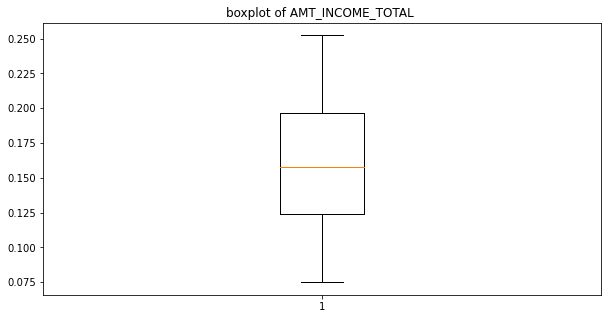

In [56]:
#AMT_INCOME_TOTAL: as we can see from the plot this category has a huge no of outliers maybe due to a huge difference in theincome levels of the applicants
plt.figure(figsize=(10,5))
plt.boxplot(new_app.AMT_INCOME_TOTAL)
plt.title("boxplot of AMT_INCOME_TOTAL ")
plt.show()

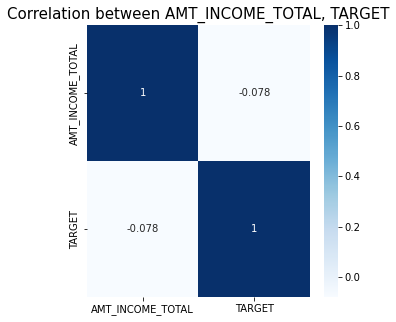

In [57]:
plt.figure(figsize= [5,5])

sns.heatmap(new_app[["AMT_INCOME_TOTAL"]+["TARGET"]].corr(), cmap="Blues",annot=True)

plt.title("Correlation between AMT_INCOME_TOTAL, TARGET", fontdict={"fontsize":15})
plt.show()
#AMT_INCOME_TOTAL has -ve correlation to target column 

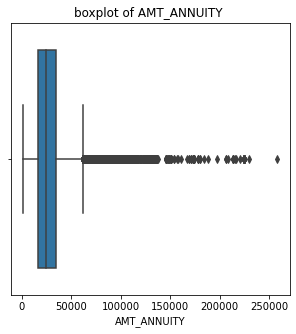

In [58]:
#AMT_ANNUITY:
plt.figure(figsize=(5,5))
sns.boxplot(new_app.AMT_ANNUITY)
plt.title("boxplot of AMT_ANNUITY ")
plt.show()

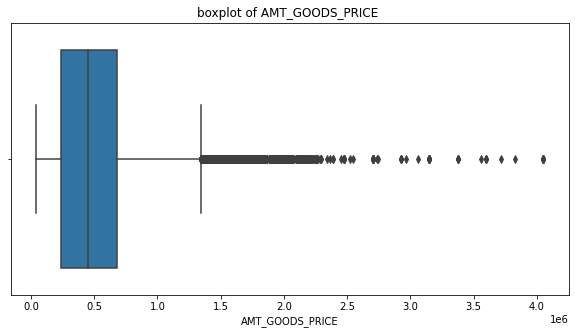

In [59]:
#AMT_GOODS_PRICE:
plt.figure(figsize=(10,5))
sns.boxplot(new_app.AMT_GOODS_PRICE)
plt.title("boxplot of AMT_GOODS_PRICE ")
plt.show()

In [187]:
#both AMT_GOODS_PRICE and AMT_Annuity has less no of outliers compared to AMT_total_income

In [ ]:
#imbalance calculation for repayer and defaulter and gender:


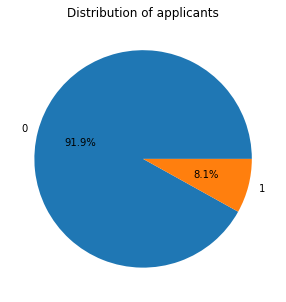

In [60]:
#Target: we can say that every 1 out of 10 applicants are defaulters
x = new_app["TARGET"].value_counts()
fig = plt.figure(figsize =(10, 5))
plt.pie(x,labels=x.index,autopct='%1.1f%%')
plt.title("Distribution of applicants")
plt.show()

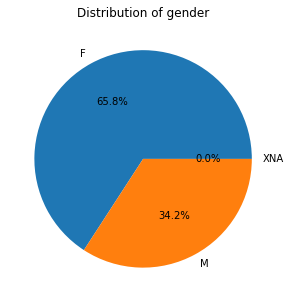

In [61]:
#CODE_GENDER: 2/3rd of applicants are females
y = new_app["CODE_GENDER"].value_counts()
fig = plt.figure(figsize =(10, 5))
plt.pie(y,labels=y.index,autopct='%1.1f%%')
plt.title("Distribution of gender")
plt.show()

In [208]:
#dividing the new_app df into target_1 and target_0 df's:


In [62]:
#target_1: applicant with payment difficulties
target_1=new_app[new_app['TARGET']==1]
target_1.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,agegroup,AMT_INCOME_RANGE
0,100002,1,Cash loans,M,Y,0,0.09461,406597.5,24700.5,351000.0,...,1,0.0,0.0,0.0,0.0,0.0,1.0,25.920548,"(25, 30]",0-1L
26,100031,1,Cash loans,F,Y,0,0.18724,979992.0,27076.5,702000.0,...,1,0.0,0.0,0.0,0.0,2.0,2.0,51.298630,"(50, 55]",0-1L
40,100047,1,Cash loans,M,Y,0,0.17482,1193580.0,35028.0,855000.0,...,1,0.0,0.0,0.0,2.0,0.0,4.0,47.895890,"(45, 50]",0-1L
42,100049,1,Cash loans,F,N,0,0.13384,288873.0,16258.5,238500.0,...,1,0.0,0.0,0.0,0.0,0.0,2.0,36.668493,"(35, 40]",0-1L
81,100096,1,Cash loans,F,Y,0,0.24794,252000.0,14593.5,252000.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,67.928767,"(65, 70]",0-1L


In [63]:
#target_0: applicant with no payment difficulties
target_0=new_app[new_app['TARGET']==0]
target_0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,agegroup,AMT_INCOME_RANGE
1,100003,0,Cash loans,F,N,0,0.16765,1293502.5,35698.5,1129500.0,...,1,0.0,0.0,0.0,0.0,0.0,0.0,45.931507,"(45, 50]",0-1L
2,100004,0,Revolving loans,M,Y,0,0.19046,135000.0,6750.0,135000.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,52.180822,"(50, 55]",0-1L
3,100006,0,Cash loans,F,Y,0,0.19005,312682.5,29686.5,297000.0,...,1,0.0,0.0,0.0,0.0,0.0,1.0,52.068493,"(50, 55]",0-1L
4,100007,0,Cash loans,M,Y,0,0.19932,513000.0,21865.5,513000.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,54.608219,"(50, 55]",0-1L
5,100008,0,Cash loans,M,Y,0,0.16941,490495.5,27517.5,454500.0,...,1,0.0,0.0,0.0,0.0,1.0,1.0,46.413699,"(45, 50]",0-1L


In [211]:
#univariate analysis on categorical variables:

In [64]:
categorical_columns= new_app.select_dtypes(include=['object']).columns.tolist()
categorical_columns

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE']

In [65]:
numerical_columns= new_app.select_dtypes(exclude=['object']).columns.tolist()
numerical_columns


['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_3',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'AGE',
 'agegroup',
 'AMT_INCOME_RANGE']

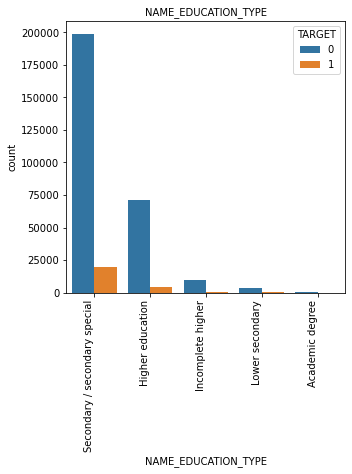

In [66]:
#education type: we can infer that most of the applicants have a secondary degree but that's no gurantee of default as these are the one's with the highest default rate
#very few have academic degree and the 2nd highest no of applicants have a higher education
#we can also observe that higher the degree range higher the default 
plt.figure(figsize=(5,5))

chart=sns.countplot(x='NAME_EDUCATION_TYPE', data=new_app, hue="TARGET")
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
chart.axes.set_title('NAME_EDUCATION_TYPE',fontsize= 10)
plt.show()


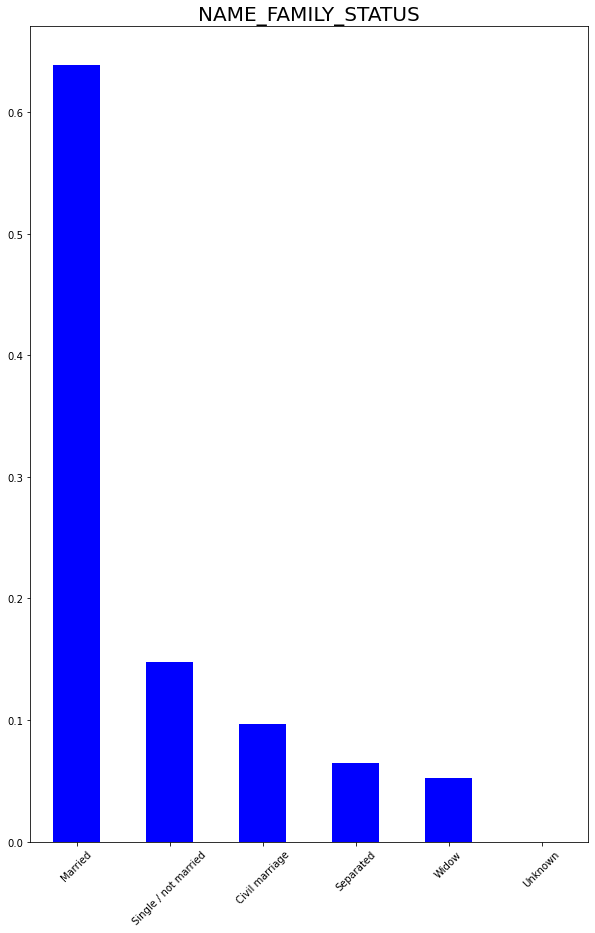

In [67]:
#plots for lifestyle analysis of applicants: Most of the applicants that is almost 60% are married 

plt.figure(figsize = (10,15))
new_app.NAME_FAMILY_STATUS.value_counts(normalize=True).plot.bar(color= "Blue")
plt.xticks(rotation=45)
plt.title("NAME_FAMILY_STATUS", fontsize= 20)
plt.show()


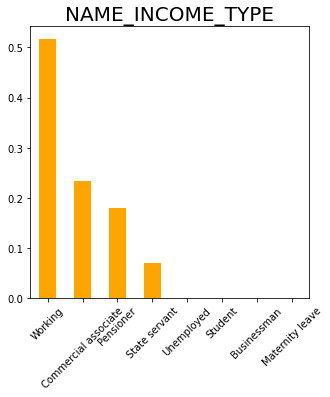

In [68]:
#more than half of our employees are working with regular incomes:
plt.figure(figsize = (5,5))
new_app.NAME_INCOME_TYPE.value_counts(normalize=True).plot.bar(color= "orange")
plt.xticks(rotation=45)
plt.title("NAME_INCOME_TYPE", fontsize= 20)
plt.show()

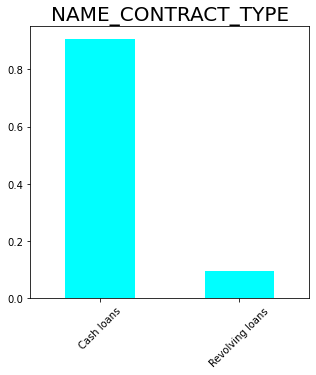

In [69]:
#only a small percent of applicants have revolving loans:
plt.figure(figsize = (5,5))
new_app.NAME_CONTRACT_TYPE.value_counts(normalize=True).plot.bar(color= "cyan")
plt.xticks(rotation=45)
plt.title("NAME_CONTRACT_TYPE", fontsize= 20)
plt.show()

Graph for :  NAME_CONTRACT_TYPE


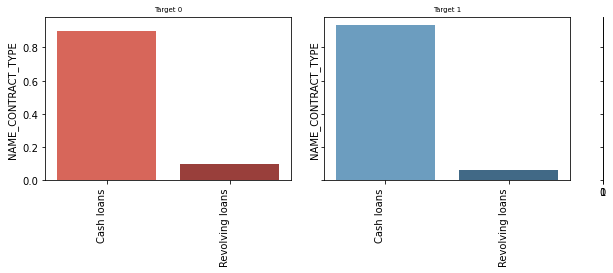

Graph for :  CODE_GENDER


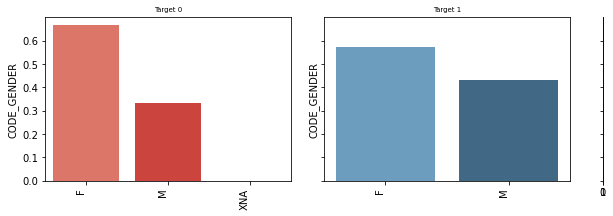

Graph for :  FLAG_OWN_REALTY


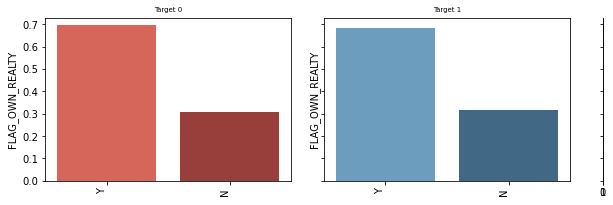

Graph for :  NAME_TYPE_SUITE


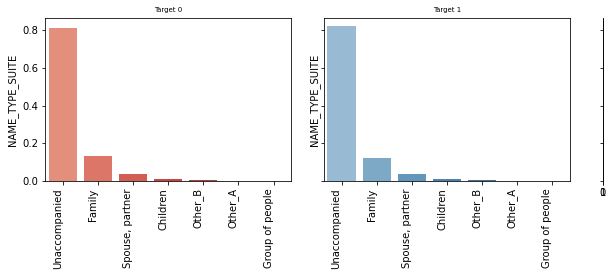

Graph for :  NAME_INCOME_TYPE


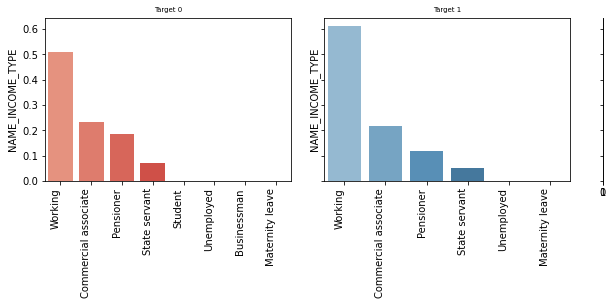

Graph for :  NAME_EDUCATION_TYPE


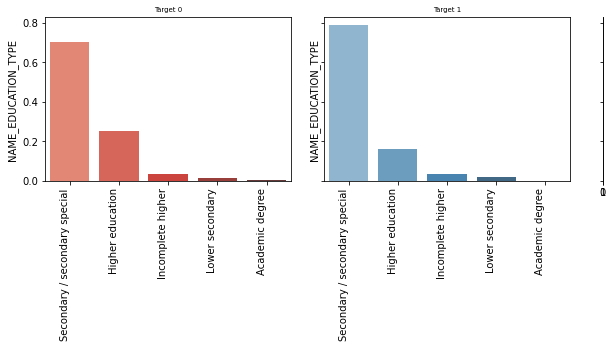

Graph for :  NAME_FAMILY_STATUS


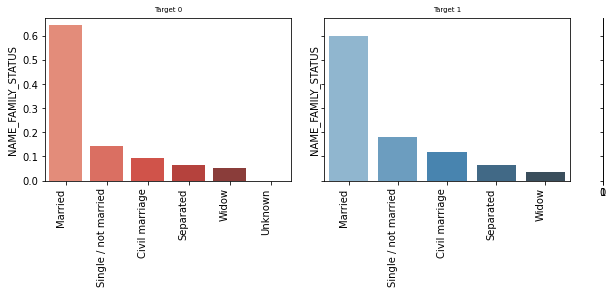

Graph for :  NAME_HOUSING_TYPE


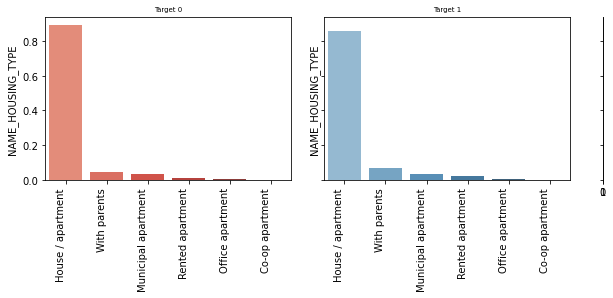

Graph for :  OCCUPATION_TYPE


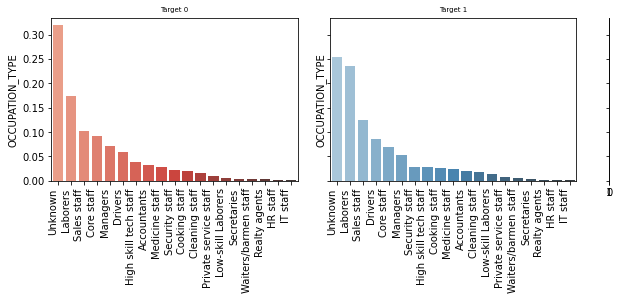

Graph for :  WEEKDAY_APPR_PROCESS_START


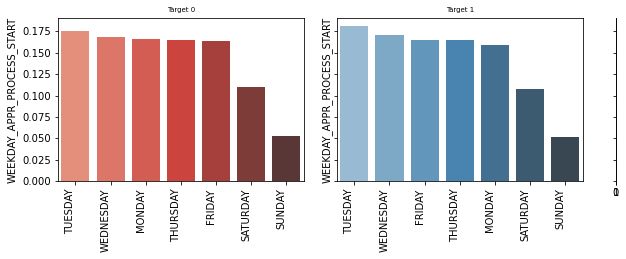

Graph for :  ORGANIZATION_TYPE


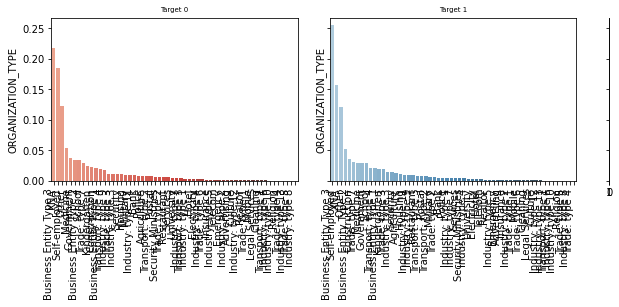

In [70]:
for i in categorical_columns:
    
    cat_0=target_0[i].value_counts(normalize=True)
    f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=True,gridspec_kw={'width_ratios':[1,1, 0.001]},figsize=(10,3))
    print("Graph for : ",i)
    chart1=sns.barplot(x=cat_0.index, y=cat_0, ax=ax1, palette="Reds_d")
    chart1.set_xticklabels(chart1.get_xticklabels(minor=False), rotation=90, horizontalalignment='right')
    chart1.axes.set_title('Target 0',fontsize= 7,color='black')
    cat_1=target_1[i].value_counts(normalize=True)
    chart2=sns.barplot(x=cat_1.index, y=cat_1,ax=ax2, palette="Blues_d")
    chart2.set_xticklabels(chart2.get_xticklabels(), rotation=90, horizontalalignment='right')
    chart2.axes.set_title('Target 1',fontsize= 7,color='black')
    plt.show()
    
   
    

#INFERENCES:
-MOST REPAYERS ARE FEMALES AND DEFAULTERS MALES
-BOTH 0 AND 1 APPLICANTS ARE UNACCOMPANIED WHILE APPLYING LOAN
-MOST APPLICANTS STAY IN AN APARTMENT OR HOUSE(CAN BE ASSUMED BY THEMSELVES OR NUCLEAR FAMILIES)
-MOST APPLICANTS OCCUPATION IS UNKOWN AND LABOURERS,SALES STAFF ARE MOST OF THE DEFAULTERS


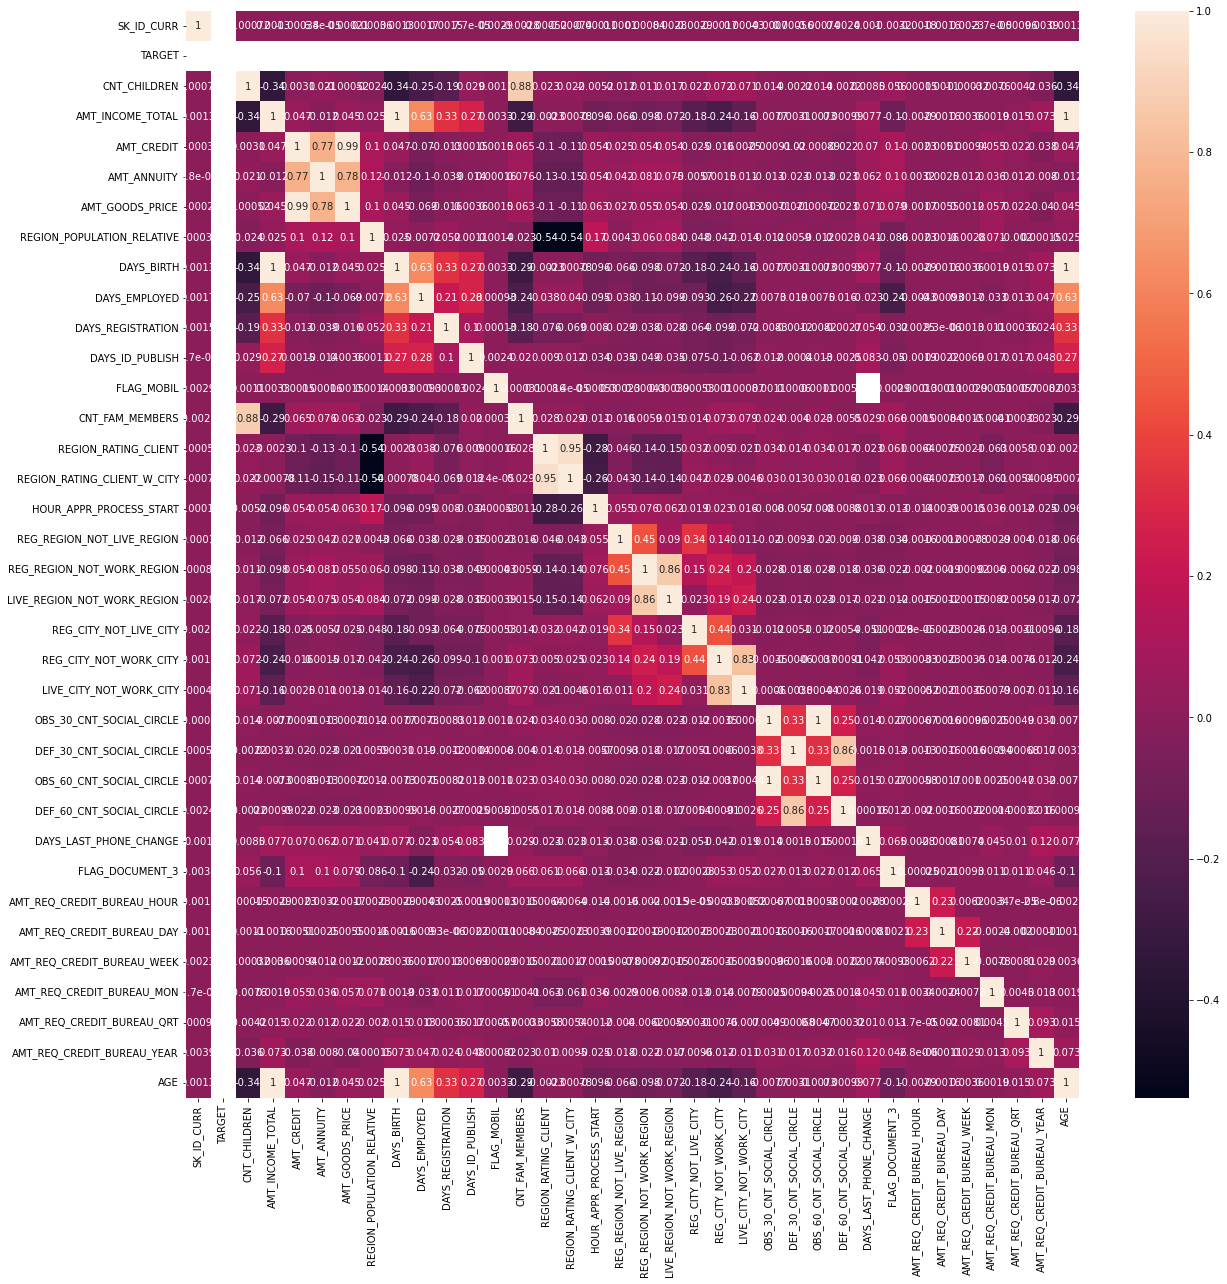

In [72]:
#correlation for target_0:
Repayer = new_app.loc[new_app['TARGET']==0, numerical_columns]


plt.subplots(figsize=(20,20))
sns.heatmap((Repayer.corr()),annot=True)
plt.show()



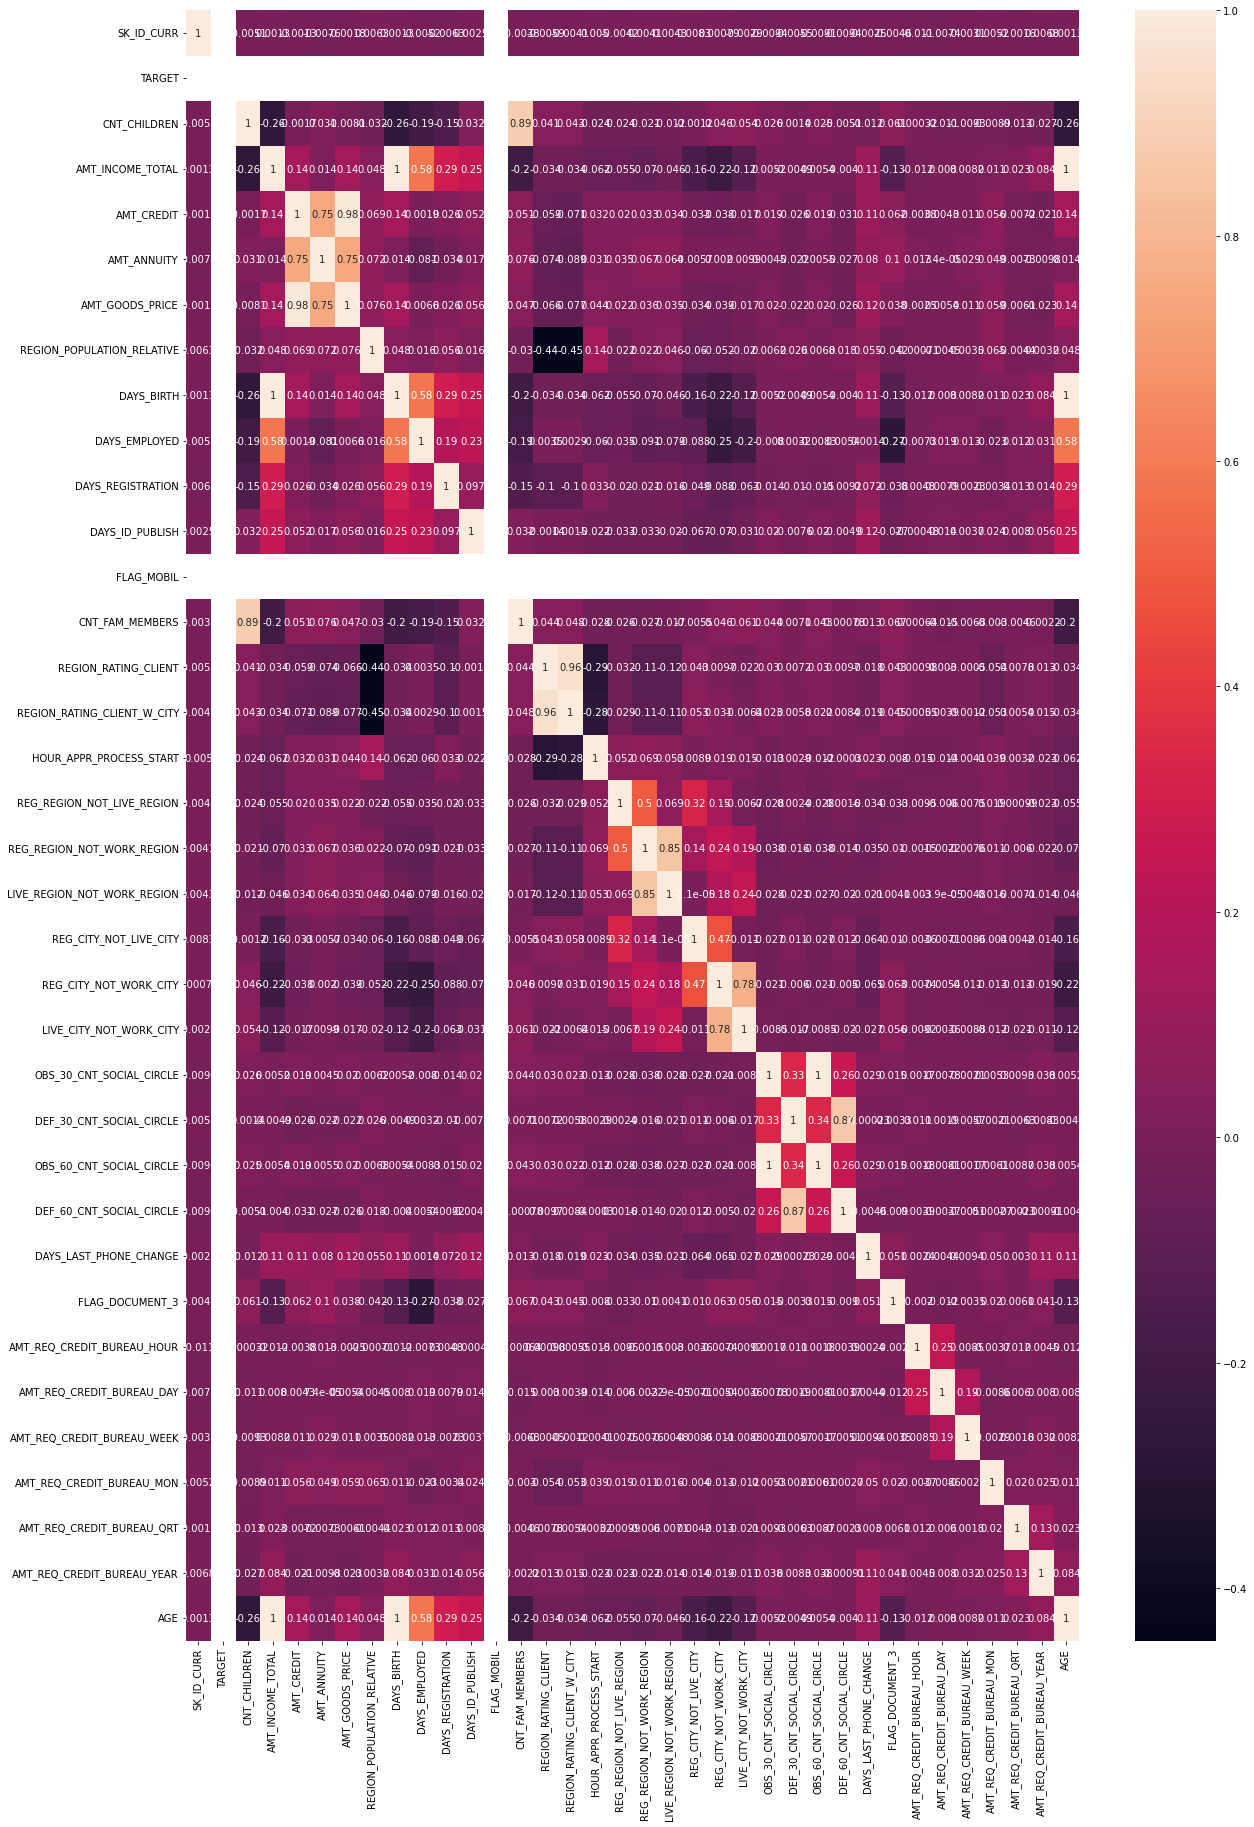

In [73]:
#correlation for target_1:
Default = new_app.loc[new_app['TARGET']==1, numerical_columns]


plt.subplots(figsize=(20,30))
sns.heatmap((Default.corr()),annot=True)
plt.show()




In [284]:
#importing previous application df:


In [75]:
prev_app = pd.read_csv("previous_application.csv")
prev_app.head(7)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,NaN,315000.0,SATURDAY,8,...,XNA,18.0,low_normal,Cash X-Sell: low,365243.0,-654.0,-144.0,-144.0,-137.0,1.0
6,2315218,175704,Cash loans,NaN,0.0,0.0,NaN,NaN,TUESDAY,11,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
prev_app.shape

(1670214, 37)

In [77]:
#statistical info summary
prev_app.describe()


,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [78]:
prev_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [82]:
#% of missing values:
w=prev_app.isnull().sum()/len(prev_app)*100

In [83]:
#dropping missing values >40%:
w_drop= w[w>40].keys()
w_drop

Index(['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_TYPE_SUITE', 'DAYS_FIRST_DRAWING',
       'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE',
       'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [84]:
#checking drop:
prev_app2 = prev_app.drop(w_drop, axis=1)
prev_app2.shape

(1670214, 26)

In [85]:
#checking for unwanted columns:
prev_app2.isnull().sum()/len(prev_app)*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDUSTRY            0.000000
CNT_PAYMENT                    22.286366
NAME_YIELD_GROUP

In [86]:
#dropping unwanted columns:
drop=['WEEKDAY_APPR_PROCESS_START', 'NAME_PRODUCT_TYPE','NAME_CASH_LOAN_PURPOSE', 'NAME_GOODS_CATEGORY','NAME_PAYMENT_TYPE','CODE_REJECT_REASON']
prev_app2.drop(axis=1, columns=drop, inplace=True)
prev_app2.shape

(1670214, 20)

In [87]:
prev_app2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 20 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_GOODS_PRICE              1284699 non-null  float64
 7   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 8   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 9   NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 10  NAME_CONTRACT_STATUS         1670214 non-null  object 
 11  DAYS_DECISION                1670214 non-null  int64  
 12  NAME_CLIENT_TYPE             1670214 non-n

In [88]:
#checking for outliers:
prev_app2.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,1.284699e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.297984e+06
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,2.278473e+05,1.248418e+01,9.964675e-01,-8.806797e+02,3.139511e+02,1.605408e+01
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,3.153966e+05,3.334028e+00,5.932963e-02,7.790997e+02,7.127443e+03,1.456729e+01
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.922000e+03,-1.000000e+00,0.000000e+00
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,5.084100e+04,1.000000e+01,1.000000e+00,-1.300000e+03,-1.000000e+00,6.000000e+00
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.123200e+05,1.200000e+01,1.000000e+00,-5.810000e+02,3.000000e+00,1.200000e+01
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,2.340000e+05,1.500000e+01,1.000000e+00,-2.800000e+02,8.200000e+01,2.400000e+01
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,6.905160e+06,2.300000e+01,1.000000e+00,-1.000000e+00,4.000000e+06,8.400000e+01


In [ ]:
#'AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','SELLERPLACE_AREA','DAYS_DECISION','CNT_PAYMENT' have max difference between 75% and max and can be considered outliers

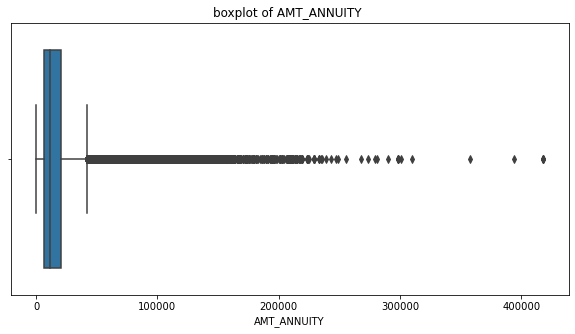

In [89]:
plt.figure(figsize=(10,5))
sns.boxplot(prev_app2.AMT_ANNUITY)
plt.title("boxplot of AMT_ANNUITY ")
plt.show()

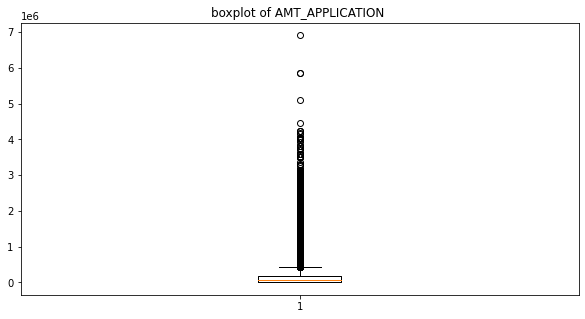

In [90]:
plt.figure(figsize=(10,5))
plt.boxplot(prev_app2.AMT_APPLICATION)
plt.title("boxplot of AMT_APPLICATION ")
plt.show()

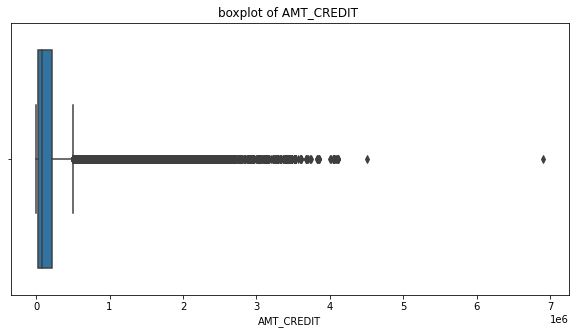

In [91]:
plt.figure(figsize=(10,5))
sns.boxplot(prev_app2.AMT_CREDIT)
plt.title("boxplot of AMT_CREDIT ")
plt.show()

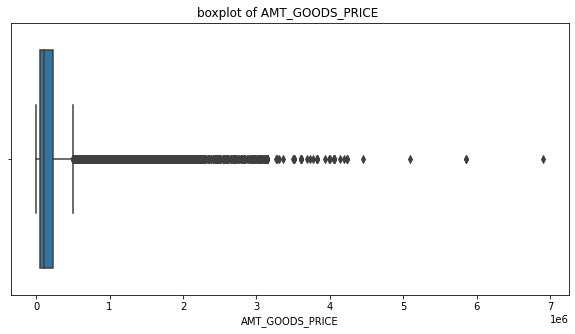

In [92]:
plt.figure(figsize=(10,5))
sns.boxplot(prev_app2.AMT_GOODS_PRICE)
plt.title("boxplot of AMT_GOODS_PRICE ")
plt.show()

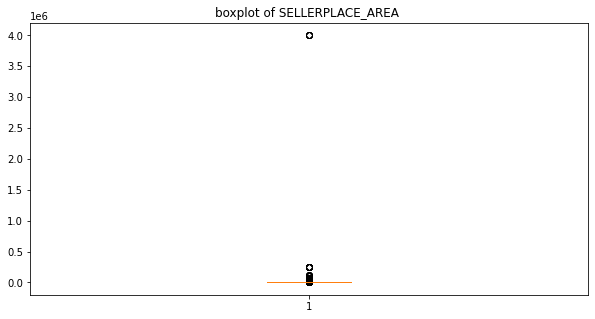

In [93]:
plt.figure(figsize=(10,5))
plt.boxplot(prev_app2.SELLERPLACE_AREA)
plt.title("boxplot of SELLERPLACE_AREA ")
plt.show()

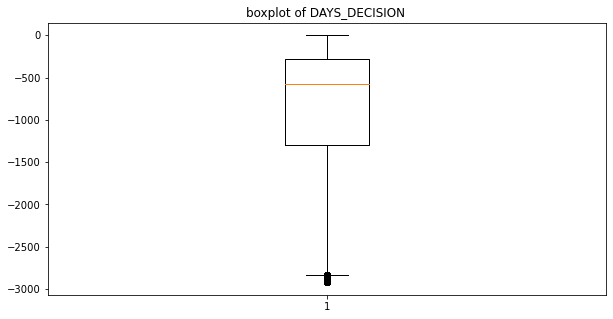

In [94]:
plt.figure(figsize=(10,5))
plt.boxplot(prev_app2.DAYS_DECISION)
plt.title("boxplot of DAYS_DECISION ")
plt.show()

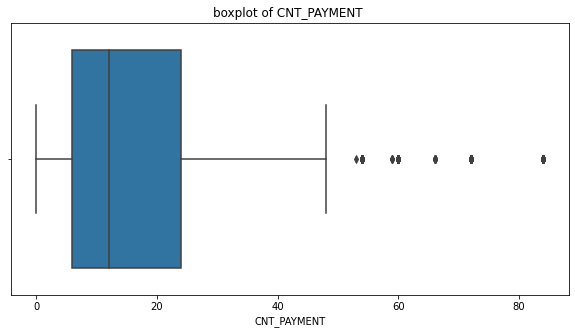

In [95]:
plt.figure(figsize=(10,5))
sns.boxplot(prev_app2.CNT_PAYMENT)
plt.title("boxplot of CNT_PAYMENT ")
plt.show()

In [315]:
#AMT_ANNUITY, AMT_APPLICATION, AMT_CREDIT, AMT_GOODS_PRICE, SELLERPLACE_AREA has a huge differencce between 75% and max which means max outliers and CNT_PAYEMENT has the least outliers

In [318]:
#merge both application and prev application df's on customer id using inner join:


In [96]:
merge = pd.merge(new_app, prev_app2, how='inner', on='SK_ID_CURR')
merge.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,...,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_CLIENT_TYPE,NAME_PORTFOLIO,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,Y,0,0.09461,406597.5,24700.5,351000.0,...,Approved,-606,New,POS,Stone,500,Auto technology,24.0,low_normal,POS other with interest
1,100003,0,Cash loans,F,N,0,0.16765,1293502.5,35698.5,1129500.0,...,Approved,-746,Repeater,Cash,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,N,0,0.16765,1293502.5,35698.5,1129500.0,...,Approved,-828,Refreshed,POS,Stone,1400,Furniture,6.0,middle,POS industry with interest
3,100003,0,Cash loans,F,N,0,0.16765,1293502.5,35698.5,1129500.0,...,Approved,-2341,Refreshed,POS,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest
4,100004,0,Revolving loans,M,Y,0,0.19046,135000.0,6750.0,135000.0,...,Approved,-815,New,POS,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest


In [97]:
#dividing merge into target 1 and target 0 to get conclusions/patterns:
m0 = merge[merge['TARGET']==0] 
m1 = merge[merge['TARGET']==1] 

In [98]:
m0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,...,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_CLIENT_TYPE,NAME_PORTFOLIO,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
1,100003,0,Cash loans,F,N,0,0.16765,1293502.5,35698.5,1129500.0,...,Approved,-746,Repeater,Cash,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,N,0,0.16765,1293502.5,35698.5,1129500.0,...,Approved,-828,Refreshed,POS,Stone,1400,Furniture,6.0,middle,POS industry with interest
3,100003,0,Cash loans,F,N,0,0.16765,1293502.5,35698.5,1129500.0,...,Approved,-2341,Refreshed,POS,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest
4,100004,0,Revolving loans,M,Y,0,0.19046,135000.0,6750.0,135000.0,...,Approved,-815,New,POS,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest
5,100006,0,Cash loans,F,Y,0,0.19005,312682.5,29686.5,297000.0,...,Approved,-181,Repeater,Cash,Credit and cash offices,-1,XNA,48.0,low_normal,Cash X-Sell: low


In [99]:
m1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,...,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_CLIENT_TYPE,NAME_PORTFOLIO,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,Y,0,0.09461,406597.5,24700.5,351000.0,...,Approved,-606,New,POS,Stone,500,Auto technology,24.0,low_normal,POS other with interest
161,100047,1,Cash loans,M,Y,0,0.17482,1193580.0,35028.0,855000.0,...,Approved,-1172,Repeater,Cards,Credit and cash offices,-1,XNA,0.0,XNA,Card X-Sell
162,100047,1,Cash loans,M,Y,0,0.17482,1193580.0,35028.0,855000.0,...,Approved,-1467,Refreshed,Cash,Credit and cash offices,-1,XNA,24.0,high,Cash X-Sell: high
163,100047,1,Cash loans,M,Y,0,0.17482,1193580.0,35028.0,855000.0,...,Refused,-1075,Repeater,Cash,Credit and cash offices,-1,XNA,36.0,low_normal,Cash Street: low
164,100047,1,Cash loans,M,Y,0,0.17482,1193580.0,35028.0,855000.0,...,Approved,-2634,New,POS,Country-wide,27,Connectivity,10.0,low_normal,POS mobile with interest


In [100]:
target_1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,agegroup,AMT_INCOME_RANGE
0,100002,1,Cash loans,M,Y,0,0.09461,406597.5,24700.5,351000.0,...,1,0.0,0.0,0.0,0.0,0.0,1.0,25.920548,"(25, 30]",0-1L
26,100031,1,Cash loans,F,Y,0,0.18724,979992.0,27076.5,702000.0,...,1,0.0,0.0,0.0,0.0,2.0,2.0,51.298630,"(50, 55]",0-1L
40,100047,1,Cash loans,M,Y,0,0.17482,1193580.0,35028.0,855000.0,...,1,0.0,0.0,0.0,2.0,0.0,4.0,47.895890,"(45, 50]",0-1L
42,100049,1,Cash loans,F,N,0,0.13384,288873.0,16258.5,238500.0,...,1,0.0,0.0,0.0,0.0,0.0,2.0,36.668493,"(35, 40]",0-1L
81,100096,1,Cash loans,F,Y,0,0.24794,252000.0,14593.5,252000.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,67.928767,"(65, 70]",0-1L


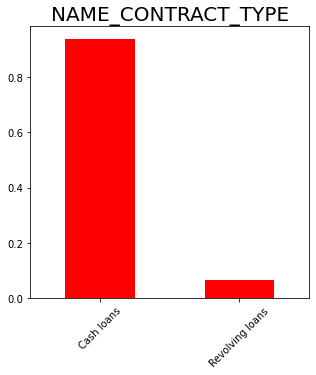

In [101]:
#what are the kind of loans defaulters hold:
plt.figure(figsize = (5,5))
target_1.NAME_CONTRACT_TYPE.value_counts(normalize=True).plot.bar(color= "red")
plt.xticks(rotation=45)
plt.title("NAME_CONTRACT_TYPE", fontsize= 20)
plt.show()



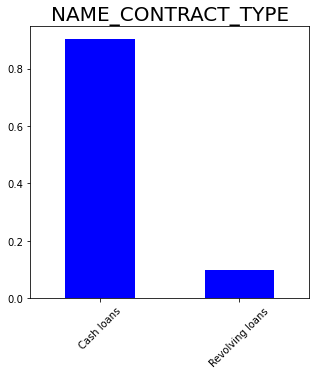

In [102]:
#what are the kind of loans repayers hold:
plt.figure(figsize = (5,5))
target_0.NAME_CONTRACT_TYPE.value_counts(normalize=True).plot.bar(color= "Blue")
plt.xticks(rotation=45)
plt.title("NAME_CONTRACT_TYPE", fontsize= 20)
plt.show()

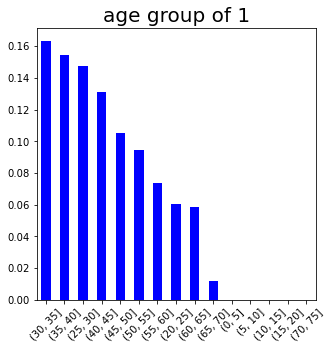

In [103]:
#age group of defaulters:
plt.figure(figsize = (5,5))
target_1.agegroup.value_counts(normalize=True).plot.bar(color= "Blue")
plt.xticks(rotation=45)
plt.title("age group of 1", fontsize= 20)
plt.show()

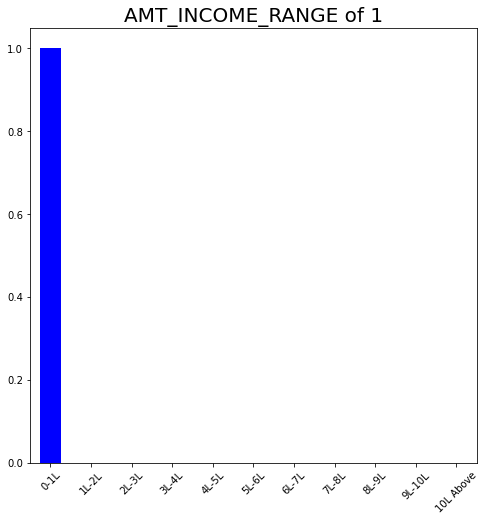

In [107]:
plt.figure(figsize = (8,8))
target_1.AMT_INCOME_RANGE.value_counts(normalize=True).plot.bar(color= "Blue")
plt.xticks(rotation=45)
plt.title("AMT_INCOME_RANGE of 1", fontsize= 20)
plt.show()

Text(0.5, 1.0, 'AMT_CREDIT VS incomegroup')

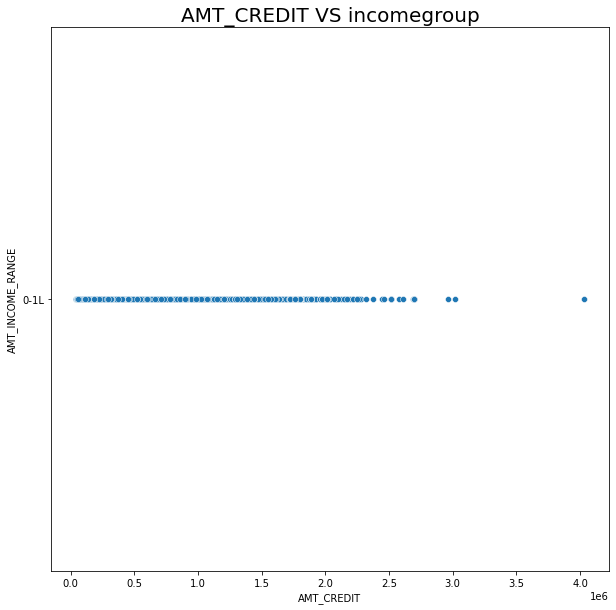

In [108]:
plt.figure(figsize = (10,10))
sns.scatterplot(x=target_1.AMT_CREDIT ,y=target_1.AMT_INCOME_RANGE)
plt.title("AMT_CREDIT VS incomegroup", fontsize= 20)